In [1]:
#	Starter code for linear regression problem
#	Below are all the modules that you'll need to have working to complete this problem
#	Some helpful functions: np.polyfit, scipy.polyval, zip, np.random.shuffle, np.argmin, np.sum, plt.boxplot, plt.subplot, plt.figure, plt.title
import sys
import csv
import numpy as np
import scipy
import matplotlib.pyplot as plt
import random as rd

In [3]:
def main():
	# read in system arguments, first the csv file, max degree fit, number of folds, verbose
	rfile = sys.argv[1]
	maxK = int(sys.argv[2])
	nFolds = int(sys.argv[3])
	verbose = bool(int(sys.argv[4]))
	
	csvfile = open(rfile, 'rb')
	dat = csv.reader(csvfile, delimiter=',')
	X = []
	Y = []
	# put the x coordinates in the list X, the y coordinates in the list Y
	for i, row in enumerate(dat):
		if i > 0:
			X.append(float(row[0]))
			Y.append(float(row[1]))
	X = np.array(X)
	Y = np.array(Y)
	nfoldpolyfit(X, Y, maxK, nFolds, verbose)

if __name__ == "__main__":
	main()


ValueError: invalid literal for int() with base 10: 'C:\\Users\\Robert\\AppData\\Roaming\\jupyter\\runtime\\kernel-9c18b625-5707-48a1-a663-3753675b935f.json'

In [26]:
def nfoldpolyfit(X, Y, maxK, n, verbose):
#	NFOLDPOLYFIT Fit polynomial of the best degree to data.
#   NFOLDPOLYFIT(X,Y,maxDegree, nFold, verbose) finds and returns the coefficients 
#   of a polynomial P(X) of a degree between 1 and N that fits the data Y 
#   best in a least-squares sense, averaged over nFold trials of cross validation.
#
#   P is a vector (in numpy) of length N+1 containing the polynomial coefficients in
#   descending powers, P(1)*X^N + P(2)*X^(N-1) +...+ P(N)*X + P(N+1). use
#   numpy.polyval(P,Z) for some vector of input Z to see the output.
#
#   X and Y are vectors of datapoints specifying  input (X) and output (Y)
#   of the function to be learned. Class support for inputs X,Y: 
#   float, double, single
#
#   maxDegree is the highest degree polynomial to be tried. For example, if
#   maxDegree = 3, then polynomials of degree 0, 1, 2, 3 would be tried.
#
#   nFold sets the number of folds in nfold cross validation when finding
#   the best polynomial. Data is split into n parts and the polynomial is run n
#   times for each degree: testing on 1/n data points and training on the
#   rest.
#
#   verbose, if set to 1 shows mean squared error as a function of the 
#   degrees of the polynomial on one plot, and displays the fit of the best
#   polynomial to the data in a second plot.
#   
#
#   AUTHOR: Robert Tom
#
    #Randomly shuffles data
    Z = zip(X,Y)
    rd.shuffle(Z)
    X,Y = zip(*Z)
    
    best_mse = 100
    best_k = 0
    best_fits = []
    mse_lists = []

    for i in range (maxK+1):
        mse_list = []
        fits = []
        for j in range(n):
            X_test = X[j*(len(X)/n):(j+1)*(len(X)/n)]
            X_train = np.append(X[0:j*(len(X)/n)],X[(j+1)*(len(X)/n):])

            Y_test = Y[j*(len(X)/n):(j+1)*(len(X)/n)]
            Y_train = np.append(Y[0:j*(len(X)/n)],Y[(j+1)*(len(X)/n):])

            fit = np.polyfit(X_train,Y_train,i)

            #Get the values from polyfit
            ybar = np.polyval(fit,X_test)
            #Calculate mse
            mse = np.mean((Y_test-ybar)**2)

            mse_list.append(mse)
            fits.append(fit)

        mse_lists.append(mse_list)

        mean_mse = np.mean(mse_list)
        if mean_mse < best_mse:
            best_k = i
            best_mse = mean_mse
            best_fits = fits
    
    #Find best mse value
    best_i = 0
    best_mse = 100
    for i in range(len(mse_lists[best_k-1])):
        if mse_lists[best_k-1][i] < best_mse:
            best_mse = mse_lists[best_k-1][i]
            best_i = i

    if verbose:
        plt.plot(range(len(mse_lists)),map(lambda x:np.mean(x),mse_lists),'bo-')
        plt.title('MSE vs degree of polynomial')
        plt.xlabel('Degree')
        plt.ylabel('MSE')
        plt.show()
        
        f = np.poly1d(best_fits[best_i])
        x = np.linspace(min(X),max(X))
        plt.plot(X,Y,'b.',x,f(x),'r-')
        plt.title('Actual data vs predicted data')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.legend(['Actual','Predicted'],loc='upper right')
        plt.show()
        
    return best_fits[best_i]

In [8]:
l1 = [0,1,2]
l2 = [1,2,3]
l3 = zip(l1,l2)
rd.shuffle(l3)
zip(*l3)

[(1, 0, 2), (2, 1, 3)]

In [8]:
plt.plot(np.array([1,2,3,4]),np.array([2,3,4,5]),'b.',np.array([1,2,3,4]),np.array([2,4,6,7]),'r',ms=10)
plt.title('Actual data vs predicted data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['Actual','Predicted'],loc='upper right')
plt.show()

In [27]:
rfile = 'bitbootcamp/linearreg.csv'
csvfile = open(rfile, 'rb')
dat = csv.reader(csvfile, delimiter=',')
X = []
Y = []
# put the x coordinates in the list X, the y coordinates in the list Y
for i, row in enumerate(dat):
	if i > 0:
		X.append(float(row[0]))
		Y.append(float(row[1]))
X = np.array(X)
Y = np.array(Y)
nfoldpolyfit(X, Y, 6, 5, 1)

array([-4.27585133,  1.78060199,  0.60676265, -0.36570065,  0.81221865,
        0.07404558])

In [29]:
%matplotlib inline

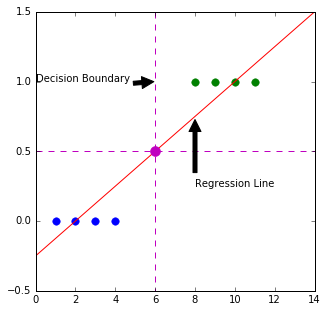

In [106]:
x = np.linspace(0,14)
f = np.poly1d([0.125,-0.25])
f2 = np.poly1d([0.5])
plt.figure(figsize=(5,5))
plt.plot(range(1,5),np.zeros(4),'b.',range(8,12),np.ones(4),'g.',x,f(x),'r-',x,f2(x),'m--',[6,6,6],[1.5,0.5,-0.5],'m--',ms = 15)
plt.plot([6],[0.5],'m.',ms=20)
plt.annotate('Decision Boundary',xy=(6,1),xytext=(0,1),arrowprops=dict(facecolor='black',shrink=0.05),)
plt.annotate('Regression Line',xy=(8,0.75),xytext=(8,0.25),arrowprops=dict(facecolor='black',shrink=0.05),)
plt.savefig('bitbootcamp/EECS349HW3-1')
plt.show()

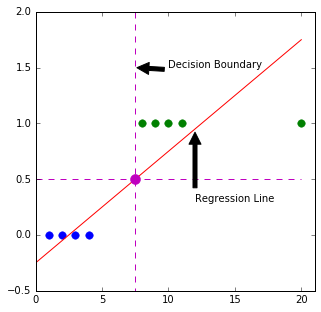

In [108]:
x = np.linspace(0,20)
f = np.poly1d([0.1,-0.25])
f2 = np.poly1d([0.5])
plt.figure(figsize=(5,5))
plt.plot(range(1,5),np.zeros(4),'b.',range(8,12)+[20],np.ones(5),'g.',x,f(x),'r-',x,f2(x),'m--',[7.5,7.5,7.5],[2,0.5,-0.5],'m--',ms = 15)
plt.plot([7.5],[0.5],'m.',ms=20)
plt.annotate('Decision Boundary',xy=(7.5,1.5),xytext=(10,1.5),arrowprops=dict(facecolor='black',shrink=0.05),)
plt.annotate('Regression Line',xy=(12,.95),xytext=(12,0.3),arrowprops=dict(facecolor='black',shrink=0.05),)
plt.xlim(0,21)
plt.savefig('bitbootcamp/EECS349HW3-2')
plt.show()

In [4]:
import sys
import csv
import numpy as np
import scipy

def main():
	rfile = sys.argv[1]
	
	#read in csv file into np.arrays X1, X2, Y1, Y2
	csvfile = open(rfile, 'rb')
	dat = csv.reader(csvfile, delimiter=',')
	X1 = []
	Y1 = []
	X2 = []
	Y2 = []
	for i, row in enumerate(dat):
		if i > 0:
			X1.append(float(row[0]))
			X2.append(float(row[1]))
			Y1.append(float(row[2]))
			Y2.append(float(row[3]))
	X1 = np.array(X1)
	X2 = np.array(X2)
	Y1 = np.array(Y1)
	Y2 = np.array(Y2)
	w_init = 1 # INTIALIZE W_INIT
	perceptrona(w_init, X1, Y1)
	perceptrona(w_init, X2, Y2)

if __name__ == "__main__":
	main()

IOError: [Errno 2] No such file or directory: '-f'

In [22]:
def perceptrona(w_init, X, Y):
    #figure out (w, k) and return them here. w is the vector of weights, k is how many iterations it took to converge.
    #	perceptrona Find a weight vector to separate the given data into binary classes
    #   perceptrona(w_init, X, Y) uses an initial weight vector for the hyperplane, and outputs 
    #   a weight vector of a separating hyperplane, as well as the number of iterations to convergence
    #
    #   w_init is a vector first containing the negative of the threshold, then the rest being the weights of the hyperplane
    #
    #   X and Y are vectors of datapoints specifying  input (X) and output (Y)
    #   of the function to be learned. Class support for inputs X,Y: 
    #   float, double, single
    #
    #   AUTHOR: Robert Tom
    #
    
    w = w_init
    k = 0
    m = len(X)
    X = map(lambda x:np.append(1,x),X)
    
    error = True
    
    while (error):
        i = k%m
        if sum(w*X[i])*Y[i]<0:
            w+=X[i]*Y[i]
            if (np.all(map(lambda x:sum(w*x),X)*Y>0)):
                error = False
        k+=1
    
    return (w, int(np.ceil(float(k/m))))

In [23]:
perceptrona([-1,1],X1,Y1)

(array([-10.     ,   3.60014]), 4)

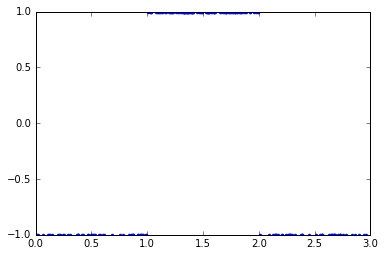

In [5]:
%matplotlib inline
rfile = 'bitbootcamp/linearclass.csv'
csvfile = open(rfile, 'rb')
dat = csv.reader(csvfile, delimiter=',')
X1 = []
Y1 = []
X2 = []
Y2 = []
for i, row in enumerate(dat):
	if i > 0:
		X1.append(float(row[0]))
		X2.append(float(row[1]))
		Y1.append(float(row[2]))
		Y2.append(float(row[3]))
X1 = np.array(X1)
X2 = np.array(X2)
Y1 = np.array(Y1)
Y2 = np.array(Y2)

plt.plot(X2,Y2,'b.')
plt.show()

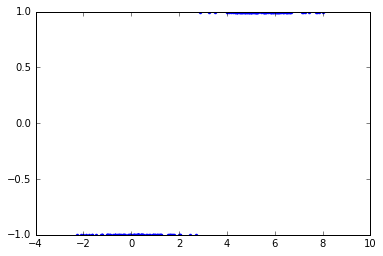

In [8]:
plt.plot(X1,Y1,'b.')
plt.show()

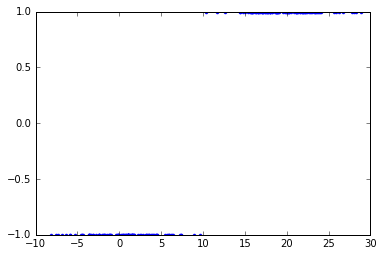

In [9]:
plt.plot(map(lambda x: 3.60014*x,X1),Y1,'b.')
plt.show()

In [ ]:
###################STILL HAVEN'T FIXED PERCEPTRON C##############################

In [24]:
def perceptronc(w_init, X, Y):
    #figure out (w, k) and return them here. w is the vector of weights, k is how many iterations it took to converge.
    #	perceptrona Find a weight vector to separate the given data into binary classes
    #   perceptrona(w_init, X, Y) uses an initial weight vector for the hyperplane, and outputs 
    #   a weight vector of a separating hyperplane, as well as the number of iterations to convergence
    #
    #	Uses an extra quadratic term to help separate non-linearly separable data
    #
    #   w_init is a scalar which will be the initial value for the weight vector (scalar since data is univariate)
    #
    #   X and Y are vectors of datapoints specifying  input (X) and output (Y)
    #   of the function to be learned. Class support for inputs X,Y: 
    #   float, double, single
    #
    #   AUTHOR: Robert Tom
    #
    
    w = w_init
    k = 0
    m = len(X)
    X = map(lambda x:np.array([1,x,x**2]),X)
    error = True
    
    while (error):
        i = k%m
        if sum(w*X[i])*Y[i]<0:
            w+=X[i]*Y[i]
            if (np.all(map(lambda x:sum(w*x),X)*Y>0)):
                error = False
        k+=1
    
    return (w, int(np.ceil(float(k/m))))

In [26]:
perceptronc([-1,-1,-1],X2,Y2)

(array([-51.        ,  76.2595925 , -25.40051179]), 734)

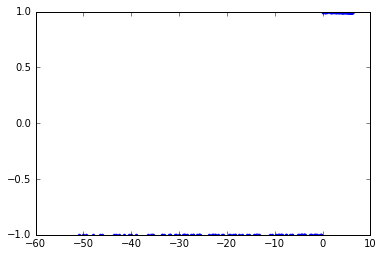

In [27]:
plt.plot(map(lambda x: -51+76.2595925*x-25.40051179*x**2,X2),Y2,'b.')
plt.show()

In [ ]:
CONCEPTS:
    
SVM (know about kernels)
Perceptrons
inductive biases
decision trees (binary)
knn
linear regression
poly regression
gradient descent
cross validation
lazy and eager learners

metric vs. not metric
concept/hypothesis/version space